In [46]:
import pandas as pd
import numpy as np

In [47]:
#reading csv file into pandas dataframe and naming df
df = pd.read_csv("/Users/beans/Desktop/Mod-4-Project/data/hour.csv")

#understanding values within df


df['dteday'] = pd.to_datetime(df['dteday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
#making season column more legibile by associating numbers with season
#shown by readme when downloaded dataset
df['season'] = df['season'].replace(1,'winter')
df['season'] = df['season'].replace(2,'spring')
df['season'] = df['season'].replace(3,'summer')
df['season'] = df['season'].replace(4,'fall')


### VERY SIMPLE EDA for season and windspeeds column

df.groupby('season')['cnt'].sum()
#--we can see that winter has the least count for rides, and summer the most
#--INTEREST OF Product Manager (PM): When/where demand is strong or fragile (strong in summer, weak in winter); user behavior patterns; which hypotheses to prioritize next quarter.

df['season'].value_counts()
#--summer does have the highest counts of records (4496), with fall being the least (4232)
#--if data is responsbly distributed by season


#curious to see the average windspeed between winter and summer, maybe its the deciding factor
df.groupby('season')['windspeed'].mean()
#--average windspeeds of winter is comparable to spring, which has the second highest count for rides, maybe not such a big deal

#checking our normal windspeeds to see if a drastic diff between seasons (readme says windspeed column was divided by 67)
df['not_norm_windspeeds'] = df['windspeed'] * 67
df.groupby('season')['not_norm_windspeeds'].mean()
#--windspeeds change are so miniscule, would have to statistically prove if significant (potential chi-squared test)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   dteday               17379 non-null  datetime64[ns]
 2   season               17379 non-null  object        
 3   yr                   17379 non-null  int64         
 4   mnth                 17379 non-null  int64         
 5   hr                   17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temp                 17379 non-null  float64       
 11  atemp                17379 non-null  float64       
 12  hum                  17379 non-null  float64       
 13  windspeed            17379 non-

<Axes: xlabel='season'>

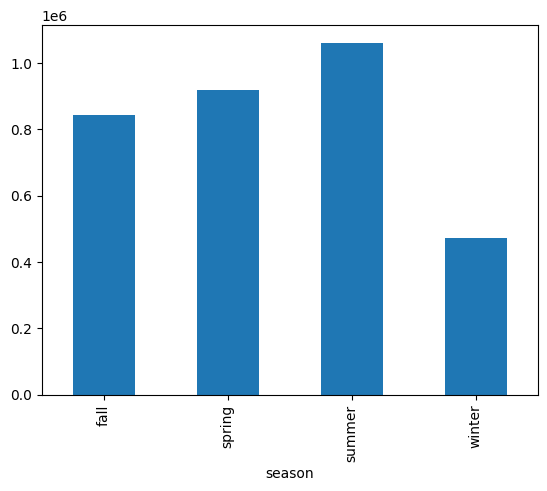

In [ ]:
#visual for seasonality differences in bikeshare usage

df.groupby('season')['cnt'].sum().plot(kind='bar')


In [ ]:
### QUICK EDA to find hour vs count (most frequent hours ppl use bikes)

#EDA to find the highest average of bike usage by hour
df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
#--shows us 17,18, and 8 has highest,
#-- 5 hours above 300 count mean

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

workingday  weekday
0           0          444027
            1           59605
            2            1013
            3            7403
            4            3920
            5            6494
            6          477807
1           1          395898
            2          468096
            3          465645
            4          481475
            5          481296
Name: cnt, dtype: int64

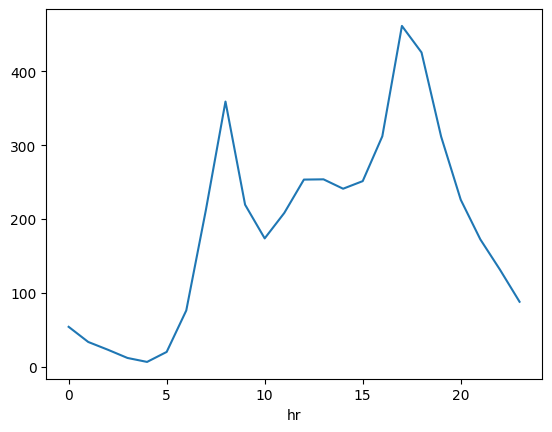

In [ ]:
hourcount = df[['hr','cnt']]


# visual explaining count of users for bikeshare program by the hour,
# hourcount uses all data, i went into specific working days in the next codeblock to see if that is of interest
hourcount.groupby('hr')['cnt'].mean().plot(kind='line')


# we can see workindays are more frequent by double
# does it make sense to filter dataset to only workingday and assume the reason why its double is due to ppl who go to work? 
both = ['workingday','weekday']

df.groupby(both)['cnt'].sum()

<Axes: xlabel='hr'>

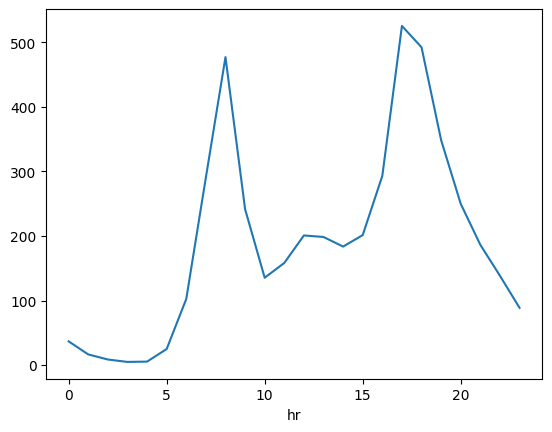

In [ ]:
#complete workingday indexes (not weekends & not holidays)

workingdays = df[df['workingday'] == 1]

#steeper curves and higher means if we just focus on working days
workingdays.groupby('hr')['cnt'].mean().plot(kind='line')

In [ ]:
workingdays.plot(kind='scatter', x='')